In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/karen/Documents/Datasets/Covid_Data.csv')

In [3]:
data.shape

(1048575, 21)

In [4]:
data_df = data[:500000]

In [5]:
data_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### Columns
* USMER - Indicates whether the patient treated medical units of the first, second or third level.
* MEDICAL_UNIT - Type of institution of the National Health System that provided the care.
* PATIENT_TYPE - type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* INTUBED - whether the patient was connected to the ventilator.
* PNEUMONIA - whether the patient already have air sacs inflammation or not.
* PREGNANT - whether the patient is pregnant or not.
* DIABETES - whether the patient has diabetes or not
* COPD - whether the patient has Chronic obstructive pulmonary disease or not
* INMSUPR - whether the patient is immunosuppressed or not.
* CLASIFFICATION_FINAL - Covid test results.
* ICU - whether the patient had been admitted to an Intensive Care Unit

In [6]:
data_df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [7]:
data_df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.578658,5.665800,1.514996,1.314134,68.000134,3.705960,44.362002,51.087236,2.221776,2.329620,2.319922,2.388226,2.159560,2.457826,2.334904,2.182176,2.324896,2.298616,4.890408,68.043458
std,0.493775,2.840416,0.499776,0.464171,43.838053,13.546507,17.373406,47.483087,6.027045,5.785854,5.804909,6.230060,5.880991,6.928000,5.874543,5.816303,5.809015,6.008053,1.903999,43.780514
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,2.000000,1.000000,97.000000,2.000000,43.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,6.000000,2.000000,2.000000,97.000000,2.000000,56.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,12.000000,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 500000 non-null  int64 
 1   MEDICAL_UNIT          500000 non-null  int64 
 2   SEX                   500000 non-null  int64 
 3   PATIENT_TYPE          500000 non-null  int64 
 4   DATE_DIED             500000 non-null  object
 5   INTUBED               500000 non-null  int64 
 6   PNEUMONIA             500000 non-null  int64 
 7   AGE                   500000 non-null  int64 
 8   PREGNANT              500000 non-null  int64 
 9   DIABETES              500000 non-null  int64 
 10  COPD                  500000 non-null  int64 
 11  ASTHMA                500000 non-null  int64 
 12  INMSUPR               500000 non-null  int64 
 13  HIPERTENSION          500000 non-null  int64 
 14  OTHER_DISEASE         500000 non-null  int64 
 15  CARDIOVASCULAR   

In [9]:
data_df['DATE_DIED'] = pd.to_datetime(data_df['DATE_DIED'], errors='coerce')

/tmp/ipykernel_8357/4202489754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['DATE_DIED'] = pd.to_datetime(data_df['DATE_DIED'], errors='coerce')


### Exploratory Data Analysis

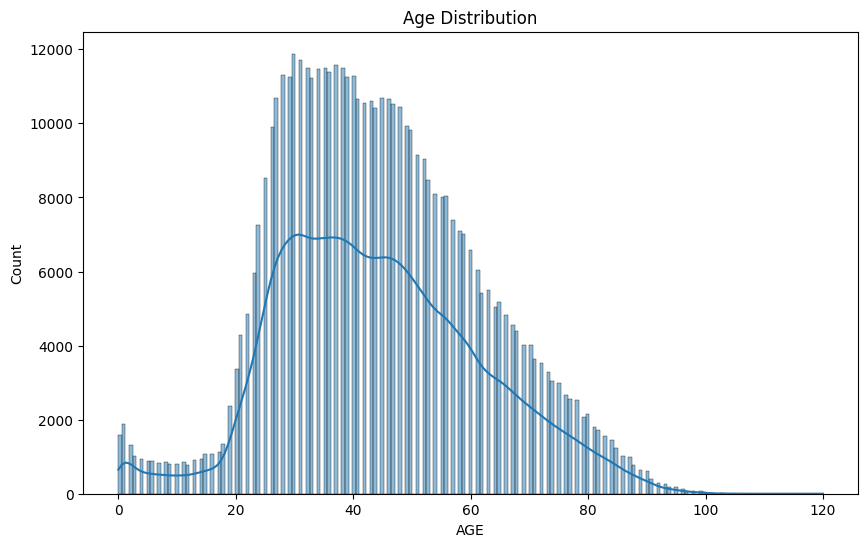

In [10]:
# AGE
plt.figure(figsize=(10, 6))
sns.histplot(data_df['AGE'], kde=True)
plt.title('Age Distribution')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

From the graph, most people who contracted COVID were between age 20 and 80

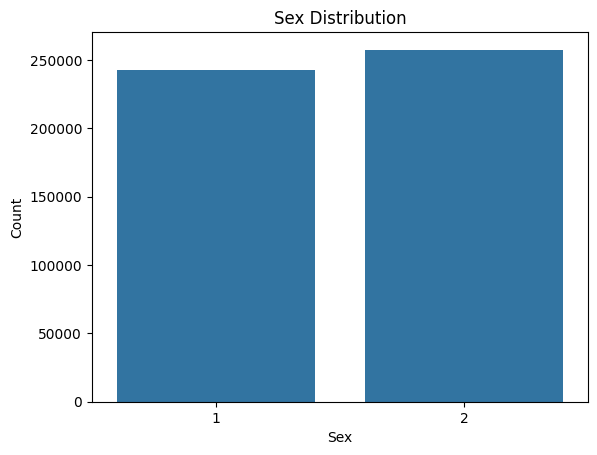

In [11]:
sns.countplot(data=data_df, x='SEX')
plt.title('Sex Distribution')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

sex_mapping = {1: 'Female', 2: 'Male'}

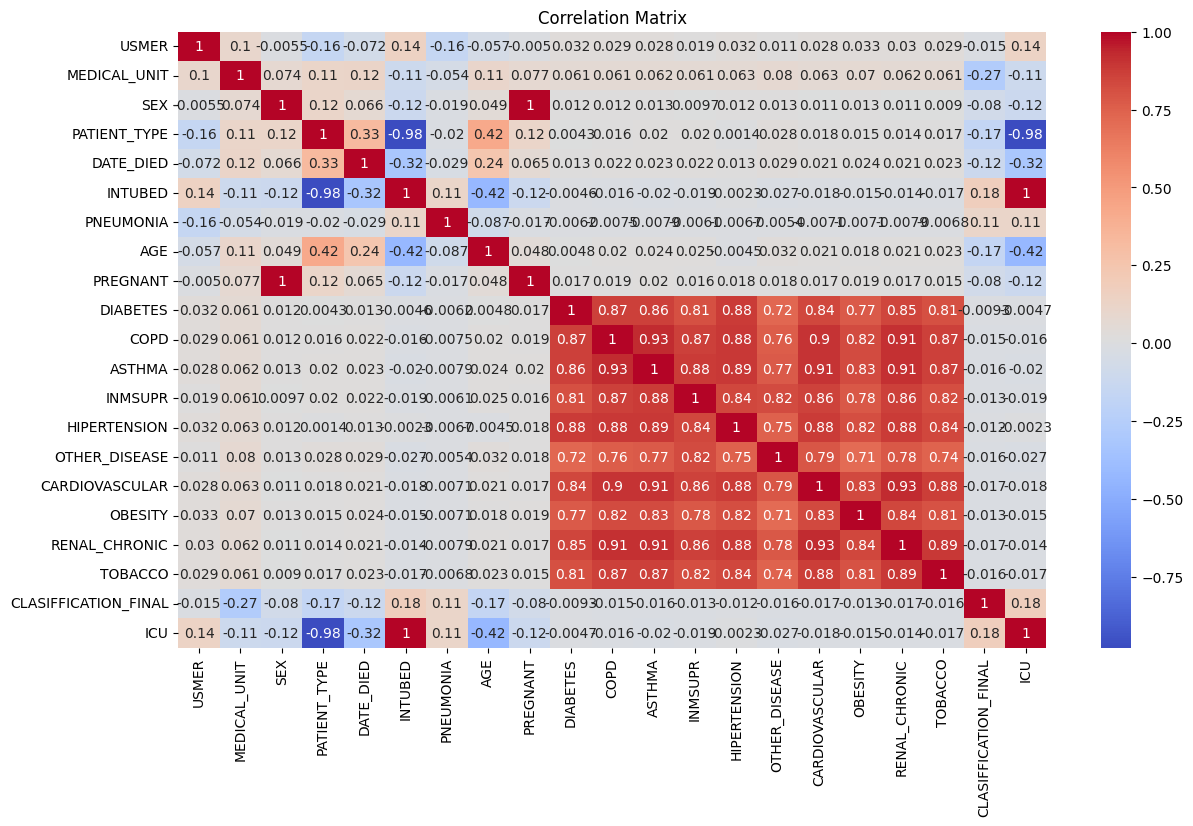

In [12]:
# Correlation Matrix
plt.figure(figsize=(14, 8))
corr_matrix = data_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
data_df.DATE_DIED.isnull().sum()

469538

In [14]:
data_df['SURVIVED'] = data_df['DATE_DIED'].isna().astype(int)

# Create age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
data_df['AGE_GROUP'] = pd.cut(data_df['AGE'], bins=bins, labels=labels, right=False)

data_df.head()

/tmp/ipykernel_8357/4177516821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['SURVIVED'] = data_df['DATE_DIED'].isna().astype(int)
/tmp/ipykernel_8357/4177516821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['AGE_GROUP'] = pd.cut(data_df['AGE'], bins=bins, labels=labels, right=False)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,SURVIVED,AGE_GROUP
0,2,1,1,1,2020-03-05,97,1,65,2,2,...,1,2,2,2,2,2,3,97,0,61-80
1,2,1,2,1,2020-03-06,97,1,72,97,2,...,1,2,2,1,1,2,5,97,0,61-80
2,2,1,2,2,2020-09-06,1,2,55,97,1,...,2,2,2,2,2,2,3,2,0,41-60
3,2,1,1,1,2020-12-06,97,2,53,2,2,...,2,2,2,2,2,2,7,97,0,41-60
4,2,1,2,1,NaT,97,2,68,97,1,...,1,2,2,2,2,2,3,97,1,61-80


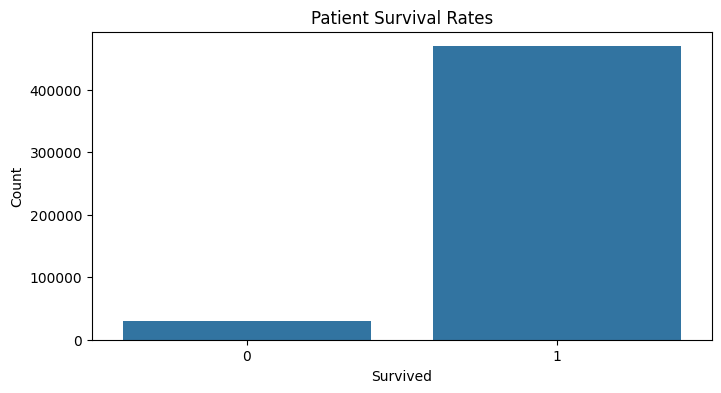

In [15]:
# Survival Rates
plt.figure(figsize=(8, 4))
sns.countplot(data=data_df, x='SURVIVED')
plt.ylabel('Count')
plt.xlabel('Survived')
plt.title('Patient Survival Rates')
plt.show()

Most Patients who contracted Covid19 survived.

#### How various factors affected survival rates

In [16]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data_df['SEX'], data_df['SURVIVED'])
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test: chi2={chi2}, p-value={p}')

# Decision based on p-value
if p < 0.05:
    print("Reject the null hypothesis - Survival depends on sex")
else:
    print("Fail to reject the null hypothesis - No evidence that survival depends on sex")

SURVIVED      0       1
SEX                    
1         10856  231646
2         19606  237892
Chi-square test: chi2=2148.0887190258554, p-value=0.0
Reject the null hypothesis - Survival depends on sex


In [17]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data_df['AGE'], data_df['SURVIVED'])
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test: chi2={chi2}, p-value={p}')

# Decision based on p-value
if p < 0.05:
    print("Reject the null hypothesis - Survival depends on age")
else:
    print("Fail to reject the null hypothesis - No evidence that survival depends on sex")

SURVIVED   0     1
AGE               
0         71  1528
1         75  1804
2         23  1287
3         15  1016
4          6   933
..        ..   ...
111        0     1
114        0     1
116        0     1
119        1     0
120        0     1

[114 rows x 2 columns]
Chi-square test: chi2=36026.22641084279, p-value=0.0
Reject the null hypothesis - Survival depends on age


In [18]:
# Map the 'SEX' column to categorical values
sex_mapping = {1: 'Female', 2: 'Male'}
data_df['SEX'] = data_df['SEX'].map(sex_mapping)

/tmp/ipykernel_8357/2795143872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['SEX'] = data_df['SEX'].map(sex_mapping)


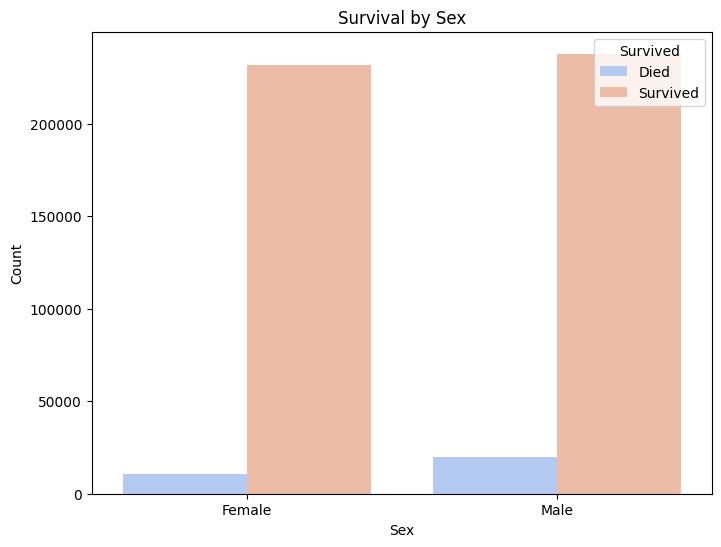

In [20]:
# Visualize relationship between survival and sex
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='SEX', hue='SURVIVED', palette='coolwarm')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Died', 'Survived'])
plt.show()

##### Visualize realtionship between survival and age

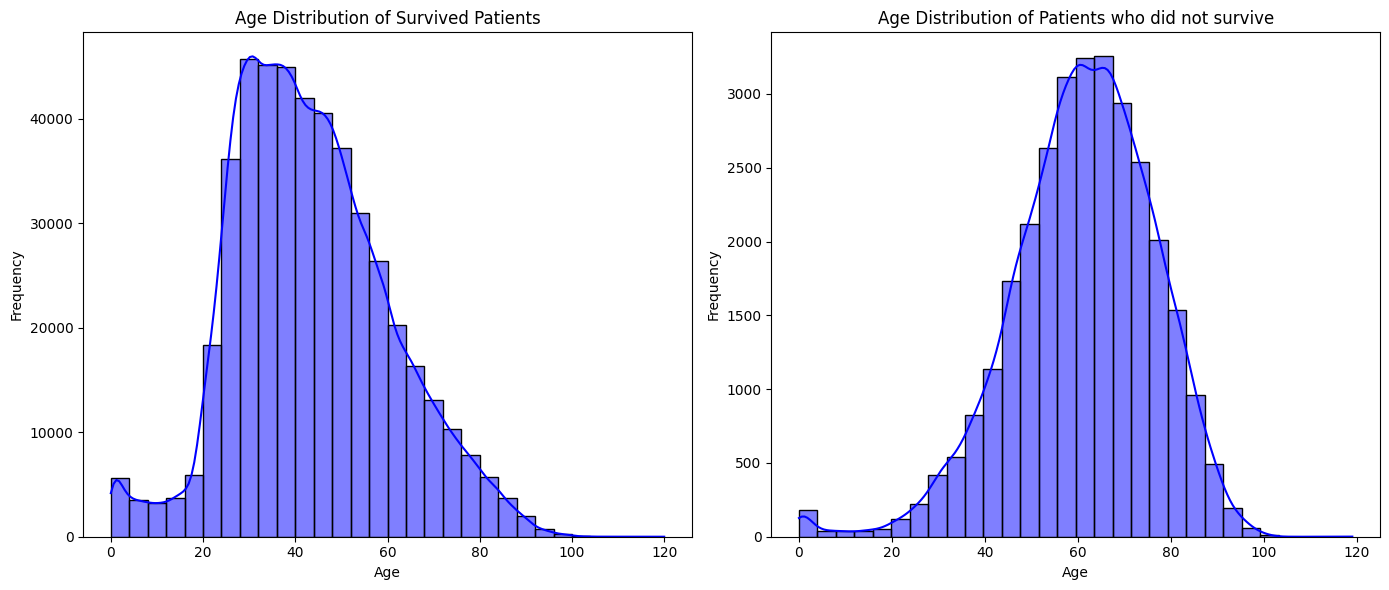

In [25]:
# Histograms of Age for Survived and Not Survived
plt.figure(figsize=(14, 6))

# Histogram of survived patients
plt.subplot(1, 2, 1)
sns.histplot(data_df[data_df['SURVIVED'] == 1]['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Survived Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram of patients who did not survive
plt.subplot(1, 2, 2)
sns.histplot(data_df[data_df['SURVIVED'] == 0]['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Patients who did not survive')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

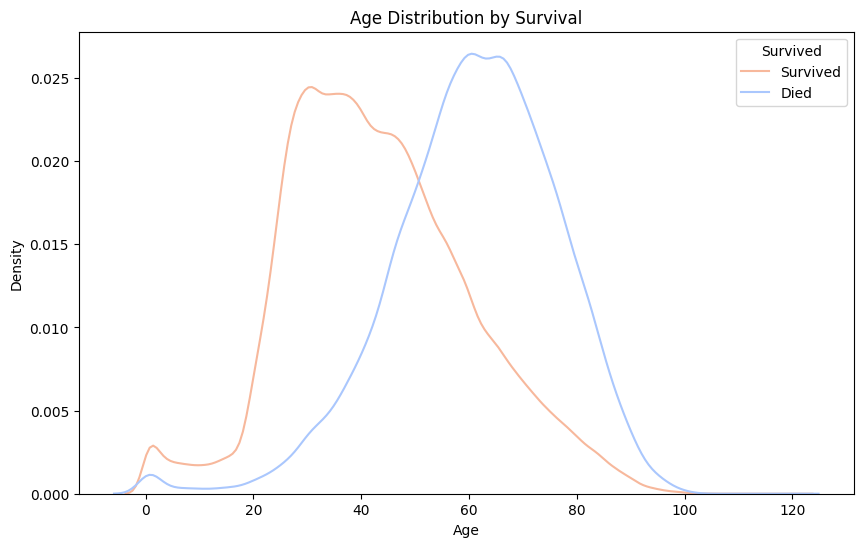

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_df, x='AGE', hue='SURVIVED', common_norm=False, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', loc='upper right', labels=['Survived', 'Died'])
plt.show()

Check if pregnancy affected survival

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data_df['PREGNANT'], data_df['SURVIVED'])
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test: chi2={chi2}, p-value={p}')

# Decision based on p-value
if p < 0.05:
    print("Reject the null hypothesis - Survival depends on whether patient was pregnant")
else:
    print("Fail to reject the null hypothesis - No evidence that survival depends on Pregnancy")

SURVIVED      0       1
PREGNANT               
1            41    3803
2         10783  226988
97        19606  237892
98           32     855
Chi-square test: chi2=2229.3542581806023, p-value=0.0
Reject the null hypothesis - Survival depends on whether patient was pregnant


In [30]:
data_df['PREGNANT'].value_counts()

PREGNANT
97    257498
2     237771
1       3844
98       887
Name: count, dtype: int64

In [32]:
# Handle the 'PREGNANT' column: replace 97 and 98 with NaN, and map 1 and 2 to 'Pregnant' and 'Not Pregnant'
data_df['PREGNANT'] = data_df['PREGNANT'].replace({97: pd.NA, 98: pd.NA})
pregnant_mapping = {1: 'Pregnant', 2: 'Not Pregnant'}
data_df['PREGNANT'] = data_df['PREGNANT'].map(pregnant_mapping)

/tmp/ipykernel_8357/2404462835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['PREGNANT'] = data_df['PREGNANT'].replace({97: pd.NA, 98: pd.NA})
/tmp/ipykernel_8357/2404462835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['PREGNANT'] = data_df['PREGNANT'].map(pregnant_mapping)


In [33]:
# Drop rows with NaN in 'PREGNANT' column for this analysis
df_pregnant = data_df.dropna(subset=['PREGNANT'])

In [35]:
# Drop rows with NaN in 'PREGNANT' column for this analysis
df_pregnant['PREGNANT'].value_counts()

PREGNANT
Not Pregnant    237771
Pregnant          3844
Name: count, dtype: int64

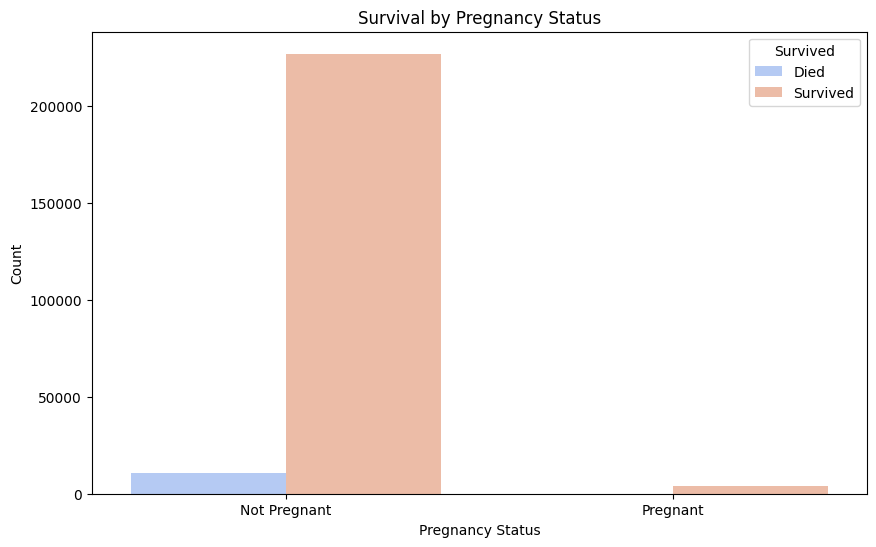

In [34]:
# Count plot for survival by pregnancy status
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pregnant, x='PREGNANT', hue='SURVIVED', palette='coolwarm')
plt.title('Survival by Pregnancy Status')
plt.xlabel('Pregnancy Status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Died', 'Survived'])
plt.show()

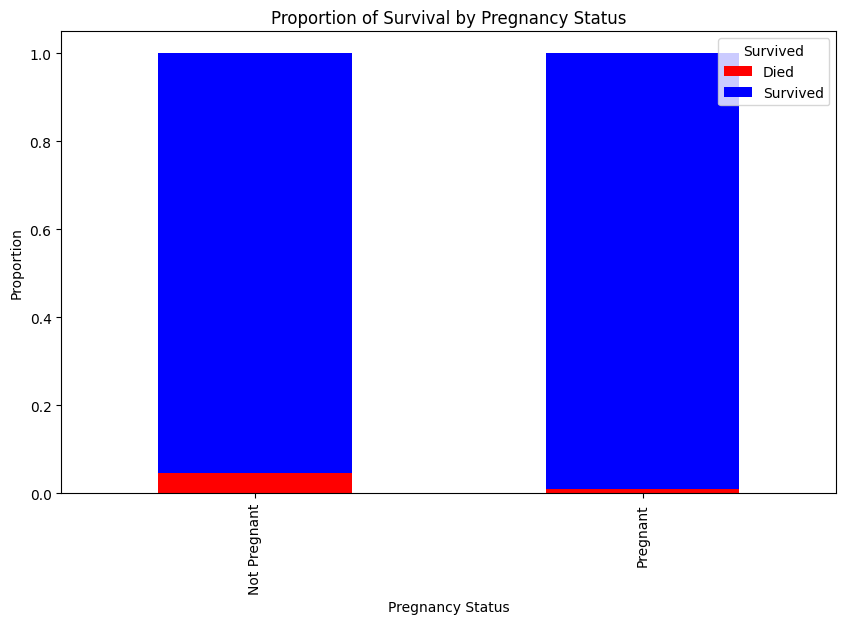

In [36]:
# Proportion plot for better clarity
survival_by_pregnant = df_pregnant.groupby('PREGNANT')['SURVIVED'].value_counts(normalize=True).unstack().fillna(0)
survival_by_pregnant.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6))
plt.title('Proportion of Survival by Pregnancy Status')
plt.xlabel('Pregnancy Status')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', labels=['Died', 'Survived'])
plt.show()

/tmp/ipykernel_8357/3582943667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['PNEUMONIA'] = data_df['PNEUMONIA'].map(pneumonia_mapping)


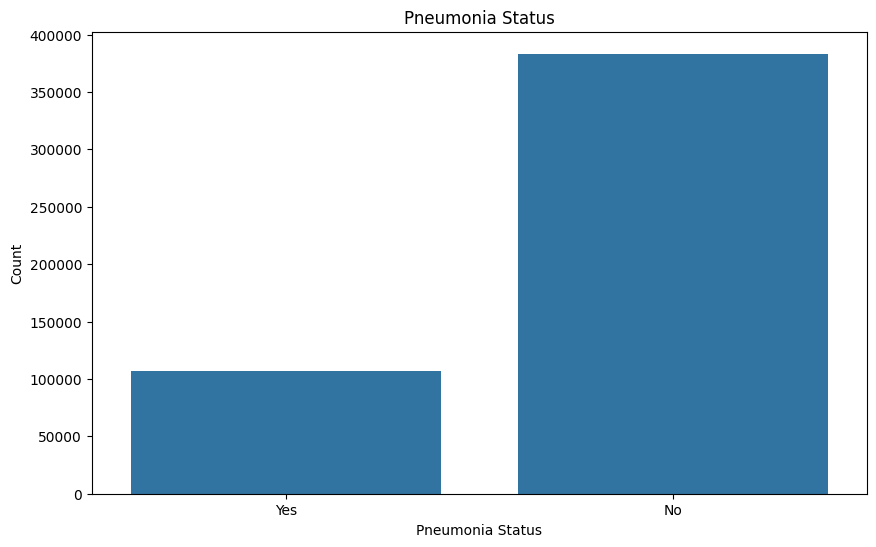

In [41]:
pneumonia_mapping = {1: 'Yes', 2: 'No'}
data_df['PNEUMONIA'] = data_df['PNEUMONIA'].map(pneumonia_mapping)

# Count plot for survival by pneumonia status
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='PNEUMONIA')
plt.title('Pneumonia Status')
plt.xlabel('Pneumonia Status')
plt.ylabel('Count')
plt.show()